In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('uci_malware_detection.csv')

In [3]:
# etiquetas a binario
df['Label'] = df['Label'].map({'non-malicious': 0, 'malicious': 1})

In [4]:
# manejo de nulos
if df.isnull().sum().sum() > 0:
    df = df.dropna()

In [5]:
# Separar características y etiquetas
X = df.drop('Label', axis=1)
y = df['Label']

In [14]:
# Dividiendo el dataset  entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
#balanceo SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [8]:
# normalizacion
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [28]:
# Evaluación del modelo
y_pred_val = clf.predict(X_val)
y_pred_test = clf.predict(X_test)

c:\Users\DAVID MALDONADO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\DAVID MALDONADO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [29]:
# función para calcular matriz de confusión
def plot_confusion_matrix(cm, title='Matriz de Confusión'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title(title)
    plt.show()

Validación:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.92      1.00      0.96        60

    accuracy                           0.93        75
   macro avg       0.96      0.83      0.88        75
weighted avg       0.94      0.93      0.93        75



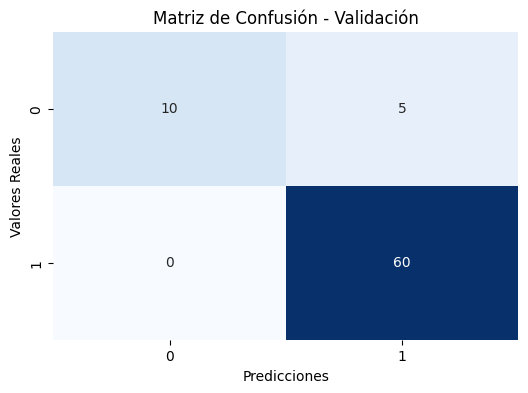

In [30]:
print("Validación:")
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
plot_confusion_matrix(cm_val, title='Matriz de Confusión - Validación')


Prueba:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.92      1.00      0.96        60

    accuracy                           0.93        75
   macro avg       0.96      0.83      0.88        75
weighted avg       0.94      0.93      0.93        75

AUC-ROC: 1.0


c:\Users\DAVID MALDONADO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


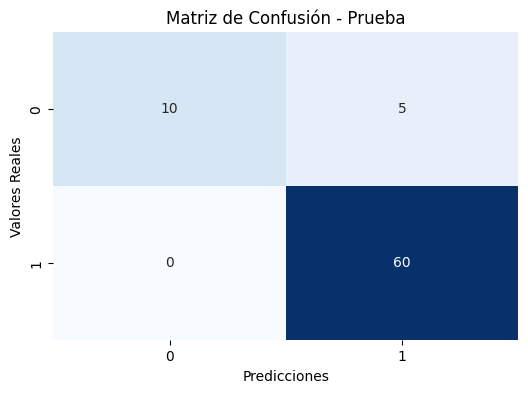

In [31]:
print("\nPrueba:")
print(classification_report(y_test, y_pred_test))
print("AUC-ROC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
cm_test = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_test, title='Matriz de Confusión - Prueba')

In [32]:
# Se analiza las caracteristicas del modelo más determinantes
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de las características:", feature_importances.head(10))


Importancia de las características: F_139    0.068402
F_162    0.053541
F_19     0.044354
F_49     0.037532
F_179    0.035701
F_385    0.034642
F_20     0.034514
F_113    0.033982
F_51     0.032723
F_66     0.031047
dtype: float64
